In [1]:
from graph_tool.all import *
import pickle
import time
import os

In [2]:
from GithubGraphML.parsing.loading import load_csv_graph, load_csv_vertices, combine_graphs, transform_bipartite, merge_parallel, prune
data_dir = './data'
lang = 'Pascal'

# Bipartide Creation Test

In [3]:
G = Graph(directed=False)
G.vp['id'] = G.new_vp('string')
G.ep['weight'] = G.new_ep('string')
G.ep['class'] = G.new_ep('string')
G.ep['class'][G.add_edge(0, 1)] = '1'
G.ep['class'][G.add_edge(1, 2)] = '2'
G.ep['class'][G.add_edge(0, 2)] = '1'
G.ep['class'][G.add_edge(0, 3)] = '2'
G.ep['class'][G.add_edge(4, 5)] = '1'
G.ep['class'][G.add_edge(4, 6)] = '2'
G.ep['class'][G.add_edge(1, 7)] = '1'
for i, e in enumerate(G.edges()): G.ep['weight'][e] = i * 0.1
for v in G.vertices(): G.vp['id'][v] = str(v)

V = Graph(3)
V.vp['class'] = V.new_vp('string', vals=['1', '2', '3'])
V.vp['id'] = V.new_vp('string', vals=['p', 'q', 'r'])
G

<Graph object, undirected, with 8 vertices and 7 edges, 1 internal vertex property, 2 internal edge properties, at 0x7f36306022c0>

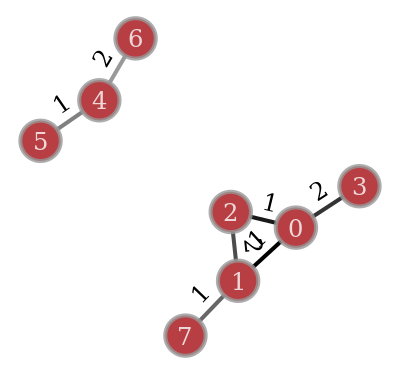

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f36306022c0, at 0x7f3630600d60>

In [4]:
graph_draw(G, output_size = (200, 200), vertex_text=G.vp['id'], edge_text=G.ep['class'], edge_color=G.ep['weight'])

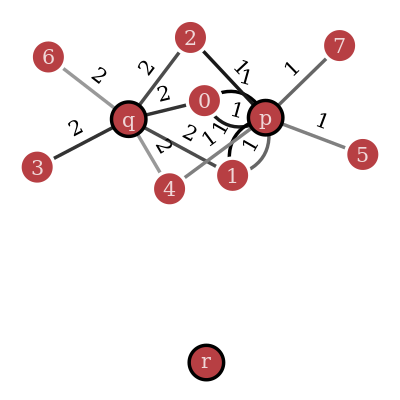

<Graph object, undirected, with 11 vertices and 14 edges, 3 internal vertex properties, 2 internal edge properties, at 0x7f36306022c0>


True

In [5]:
transform_bipartite(G, V, 'class')
graph_draw(G, output_size = (200, 200), vertex_text=G.vp['id'], edge_text=G.ep['class'], edge_color=G.ep['weight'], vertex_color=G.vp['bipartite'])
print(G)
is_bipartite(G)

In [6]:
G.ep['weight'] = G.ep['weight'].t(float, value_type='float')
merge_parallel(G, [G.ep['weight']])
prune(G)

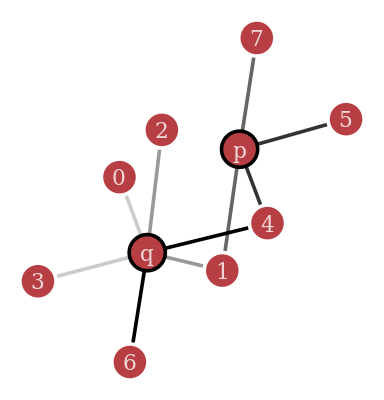

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f36306022c0, at 0x7f3630601e70>

In [7]:
graph_draw(GraphView(G), output_size = (200, 200), vertex_text=G.vp['id'], edge_color=G.ep['weight'], vertex_color=G.vp['bipartite'])

# Test On Real Graph

In [8]:
start_time = time.time()
G, vp = load_csv_graph(f"{data_dir}/developers_social_network/{lang.upper()}_developers_social_network.csv", (1, 2), vprop_name='repository_id')
G.ep['language'] = G.new_ep('string', val=lang)
G.set_directed(False)
end_time = time.time()
print('runtime:', end_time - start_time)
G

runtime: 0.07526874542236328


<Graph object, undirected, with 4241 vertices and 12008 edges, 1 internal vertex property, 6 internal edge properties, at 0x7f36306007f0>

In [9]:
start_time = time.time()
with open('repositories.pkl', 'rb') as f:
    V = pickle.load(f)
end_time = time.time()
print('runtime:', end_time - start_time)
V

runtime: 8.387482166290283


<Graph object, directed, with 8556778 vertices and 0 edges, 10 internal vertex properties, at 0x7f3630602500>

In [10]:
start_time = time.time()
transform_bipartite(G, V, 'repository_id')
end_time = time.time()
print('runtime:', end_time - start_time)
G

runtime: 310.20647525787354


<Graph object, undirected, with 8561019 vertices and 24016 edges, 11 internal vertex properties, 6 internal edge properties, at 0x7f36306007f0>

In [11]:
is_bipartite(G)

True

In [ ]:
start_time = time.time()
G.ep['number_commits'] = G.ep['number_commits'].t(int, value_type='int')
merge_parallel(G, [G.ep['number_commits']])
end_time = time.time()
print('merging parallel edges:', end_time - start_time)
G

merging parallel edges: -148.0647258758545


<Graph object, undirected, with 8561019 vertices and 5250 edges, 11 internal vertex properties, 7 internal edge properties, edges filtered by <EdgePropertyMap object with value type 'bool', for Graph 0x7f36306007f0, at 0x7f3630601780>, vertices filtered by <VertexPropertyMap object with value type 'bool', for Graph 0x7f36306007f0, at 0x7f3630600c40>, at 0x7f36306007f0>

In [ ]:
start_time = time.time()
prune(G)
end_time = time.time()
print('runtime:', end_time - start_time)
G

runtime: -150.6501088142395


<Graph object, undirected, with 8561019 vertices and 5250 edges, 12 internal vertex properties, 7 internal edge properties, edges filtered by <EdgePropertyMap object with value type 'bool', for Graph 0x7f36306007f0, at 0x7f3630601780>, vertices filtered by <VertexPropertyMap object with value type 'bool', for Graph 0x7f36306007f0, at 0x7f35f4f3e290>, at 0x7f36306007f0>

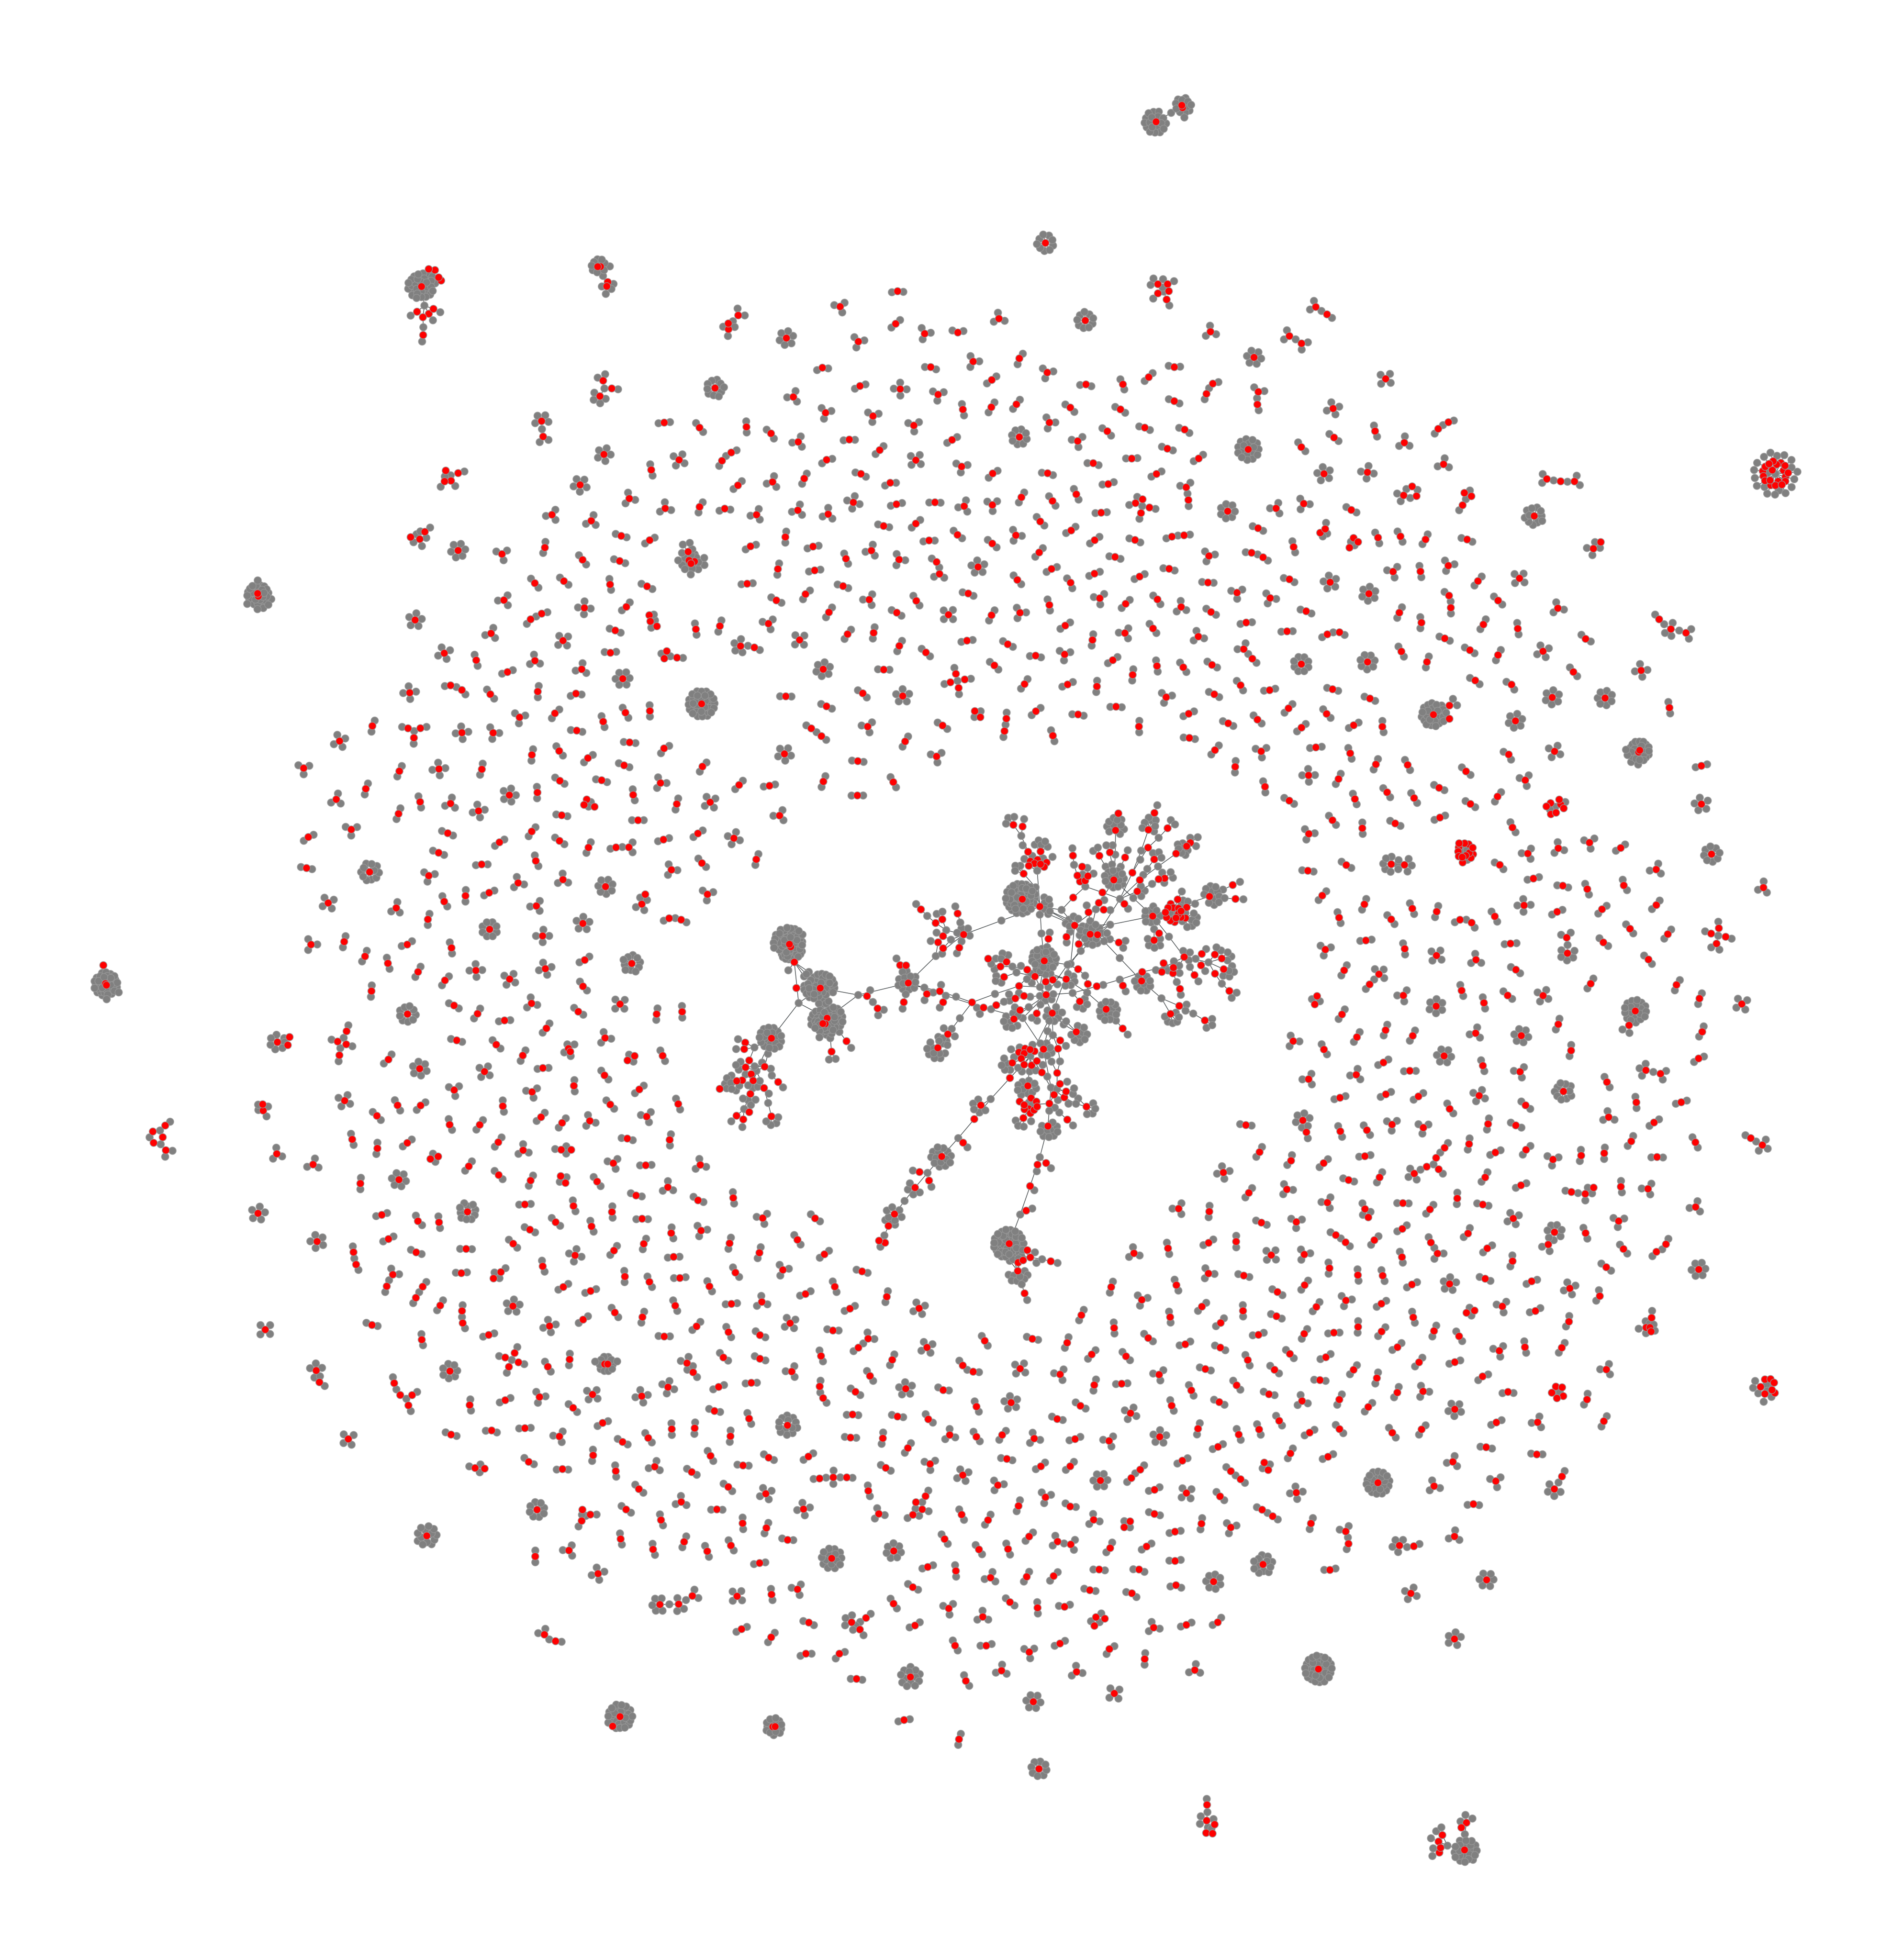

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f36306007f0, at 0x7f3630601de0>

In [ ]:
# User is grey, repo is red
graph_draw(GraphView(G), output_size = (2048, 2048), vertex_fill_color=G.vp['bipartite'].t(lambda x: ["grey", "red"][x], value_type='string'))

In [ ]:
print(GraphView(G))

<GraphView object, undirected, with 5743 vertices and 5250 edges, 12 internal vertex properties, 7 internal edge properties, edges filtered by <EdgePropertyMap object with value type 'bool', for Graph 0x7f361980f460, at 0x7f361980e7a0>, vertices filtered by <VertexPropertyMap object with value type 'bool', for Graph 0x7f361980f460, at 0x7f36306013f0>, at 0x7f361980f460>
